In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def normalize(X):
    '''
      Normalise data before processing
      Return normalized data and normalization parameters
    '''
    num = X.shape[1]

    NormParams = np.zeros((2, num))
    NormParams[0] = X.mean(axis=0)
    NormParams[1] = X.std(axis=0,ddof=1)

    X = (X - NormParams[0]) / NormParams[1]

    return X, NormParams

In [4]:
def transform(X,n_components):
    '''
        Select components with largest variance:
            1) Estimate covariance matrix
            2) Find its eigenvalues and eigenvectors
            3) Check if eigenvalues are complex -> to real space
            4) Sort vals & vectors
            5) Select n components
            5) Project all data on the selected components  
    '''
    cov = np.dot(X.T, X) / len(X)
    
    e_val, e_vect = np.linalg.eig(cov)
    
    e_val = np.absolute(e_val)
    
    ind = np.argsort(-e_val)
    e_vect = e_vect[:, ind]
    e_vect = e_vect.astype(float)
    
    e_vect_reduced = e_vect[:, :n_components]
    new_X = np.dot(X, e_vect_reduced)
    return new_X, e_vect_reduced

In [5]:
def restore(X_reduced, evect_reduced, norm_params):
    '''
        Restore "original" values:
            1) Restore original size
            2) Rescale
    '''
    restored = np.dot(X_reduced, evect_reduced.T)
    for j in range((restored).shape[1]):
        restored[:, j] = (restored[:, j] * norm_params[1, j]) + norm_params[0][j]
    return restored

## All processing

### Simple data

In [6]:
points = 10
X = np.zeros((points,2))
x = np.arange(1,points+1)
y = 4 * x *x + np.random.randn(points)*2
X[:,1] = y
X[:,0] = x
number_of_components = 1

In [7]:
# normalization
X_norm, norm_params = normalize(np.copy(X))

# dimension reduction
X_reduced, evect_reduced = transform(X_norm, number_of_components)

# restoring dimensions
restored_X = restore(X_reduced, evect_reduced,norm_params )

### Visualization

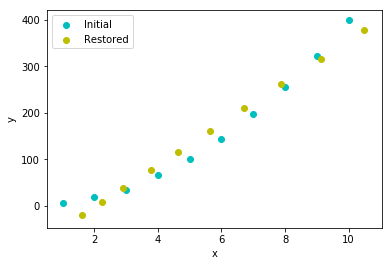

In [8]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color='c', label='Initial')
plt.scatter(restored_X[:, 0], restored_X[:, 1], color='y', label='Restored')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Try use PCA on image

In [14]:
from PIL import Image
number_of_components_image = 150

# read image 
img = Image.open('pct.jpg')
# black & white transformation
img = img.convert('L')

# create numpy array
img_X = (np.copy(np.asarray(img))).astype(float)

# normalization
X_norm_img, norm_params = normalize(img_X)

# dimension reduction
X_reduced_img, evect_reduced = transform(X_norm_img, number_of_components_image)

# dimension restoring
X_restored_img = restore(X_reduced_img, evect_reduced, norm_params)

# create from restored array
restored_img = Image.fromarray(X_restored_img.astype('uint'))

img.show()
restored_img.show()

C:\anaconda420\lib\site-packages\ipykernel\__main__.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


In [13]:
norm_params

array([[ 111.26944444,  111.6962963 ,  112.11388889, ...,  111.61666667,
         112.34166667,  118.86666667],
       [  53.91252476,   53.64326599,   53.00101413, ...,   56.63385237,
          57.0252446 ,   60.9094711 ]])